In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.layers import Embedding, LSTM, Dropout
from keras.layers import TimeDistributed
from keras.layers.core import Dense, Activation, Dropout, RepeatVector
from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pickle
import sys
import heapq
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image

In [ ]:
dataset = open("/content/sample_data/corpus.txt", "r").read()

In [ ]:
def create_word_cloud(string):
   #maskArray = npy.array(Image.open("cloud.png"))
   cloud = WordCloud(background_color = "white", max_words = 1000,  stopwords = set(STOPWORDS))
   cloud.generate(string)
   cloud.to_file("wordCloud.png")

In [ ]:
dataset = dataset.lower()

In [ ]:
create_word_cloud(dataset)

In [ ]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 12, 5


path = '/content/sample_data/corpus.txt'
text = open(path).read().lower()
print('corpus length:', len(text))

corpus length: 25060


In [ ]:
chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

print(f'unique chars: {len(chars)}')

unique chars: 42


In [ ]:
SEQUENCE_LENGTH = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - SEQUENCE_LENGTH, step):
    sentences.append(text[i: i + SEQUENCE_LENGTH])
    next_chars.append(text[i + SEQUENCE_LENGTH])
print(f'num training examples: {len(sentences)}')

num training examples: 8340


In [ ]:
X = np.zeros((len(sentences), SEQUENCE_LENGTH, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
model = Sequential()
model.add(LSTM(1000, input_shape=(SEQUENCE_LENGTH, len(chars))))
model.add(Dropout(0.2))
model.add(Dense(len(chars)))
model.add(Dense(1,activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1000)              4172000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 42)                42042     
                                                                 
 dense_1 (Dense)             (None, 1)                 43        
                                                                 
Total params: 4,214,085
Trainable params: 4,214,085
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, validation_split=0.2, verbose=1, batch_size=256, epochs=20, shuffle=True).history

Epoch 1/20
27/27 [==============================] - 149s 5s/step - loss: 0.0266 - accuracy: 0.9762 - val_loss: 0.0238 - val_accuracy: 0.9762
Epoch 2/20
27/27 [==============================] - 146s 5s/step - loss: 0.0238 - accuracy: 0.9762 - val_loss: 0.0238 - val_accuracy: 0.9762
Epoch 3/20
27/27 [==============================] - 147s 5s/step - loss: 0.0238 - accuracy: 0.9762 - val_loss: 0.0238 - val_accuracy: 0.9762
Epoch 4/20
27/27 [==============================] - 150s 6s/step - loss: 0.0238 - accuracy: 0.9762 - val_loss: 0.0238 - val_accuracy: 0.9762
Epoch 5/20
27/27 [==============================] - 148s 5s/step - loss: 0.0238 - accuracy: 0.9762 - val_loss: 0.0238 - val_accuracy: 0.9762
Epoch 6/20
27/27 [==============================] - 149s 6s/step - loss: 0.0238 - accuracy: 0.9762 - val_loss: 0.0238 - val_accuracy: 0.9762
Epoch 7/20
27/27 [==============================] - 148s 5s/step - loss: 0.0238 - accuracy: 0.9762 - val_loss: 0.0238 - val_accuracy: 0.9762
Epoch 8/20
27

In [ ]:
model.save('/content/sample_data/model1.h5',save_format='h5')

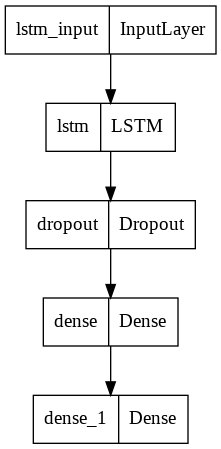

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

In [ ]:
scores = model.evaluate(X, y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 97.62%


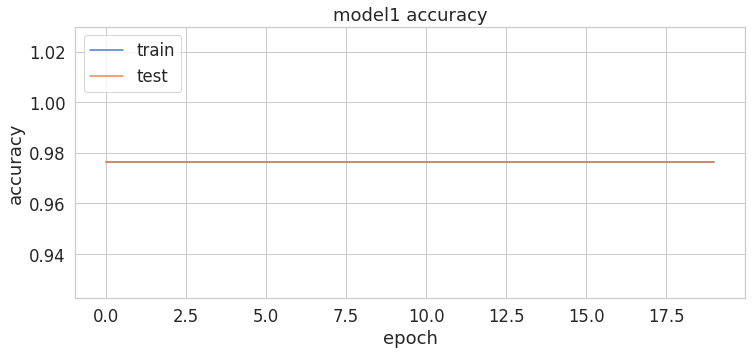

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

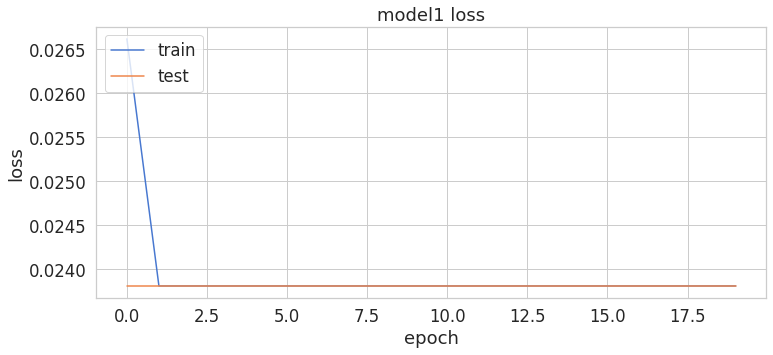

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
model2 = Sequential()
model2.add(LSTM(512, input_shape=(SEQUENCE_LENGTH, len(chars))))
model2.add(Dense(len(chars)))
model2.add(Activation('softmax'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 512)               1136640   
                                                                 
 dense_2 (Dense)             (None, 42)                21546     
                                                                 
 activation (Activation)     (None, 42)                0         
                                                                 
Total params: 1,158,186
Trainable params: 1,158,186
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = RMSprop(lr=0.01)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model2.fit(X, y, validation_split=0.05, batch_size=256, epochs=20, shuffle=True).history

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


31/31 [==============================] - 56s 2s/step - loss: 3.6885 - accuracy: 0.1260 - val_loss: 2.9905 - val_accuracy: 0.0624
Epoch 2/20
31/31 [==============================] - 57s 2s/step - loss: 2.9501 - accuracy: 0.1715 - val_loss: 2.8066 - val_accuracy: 0.1894
Epoch 3/20
31/31 [==============================] - 52s 2s/step - loss: 2.7081 - accuracy: 0.2508 - val_loss: 2.5265 - val_accuracy: 0.2926
Epoch 4/20
31/31 [==============================] - 52s 2s/step - loss: 2.5125 - accuracy: 0.2885 - val_loss: 2.3946 - val_accuracy: 0.2974
Epoch 5/20
31/31 [==============================] - 53s 2s/step - loss: 2.3279 - accuracy: 0.3294 - val_loss: 2.2681 - val_accuracy: 0.3285
Epoch 6/20
31/31 [==============================] - 53s 2s/step - loss: 2.1832 - accuracy: 0.3619 - val_loss: 2.2380 - val_accuracy: 0.3285
Epoch 7/20
31/31 [==============================] - 52s 2s/step - loss: 2.0028 - accuracy: 0.3959 - val_loss: 2.0928 - val_accuracy: 0.3861
Epoch 8/20
31/31 [=============

In [ ]:
model2.save('/content/sample_data/model2.h5',save_format='h5')

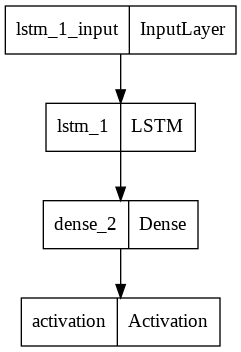

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model2, to_file='model.png', show_layer_names=True)

In [ ]:
scores = model2.evaluate(X, y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 95.25%


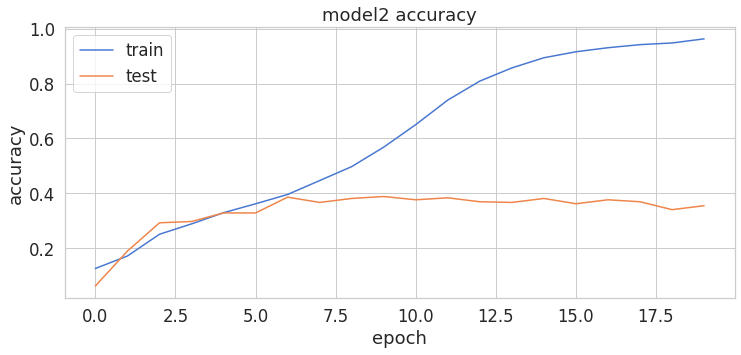

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

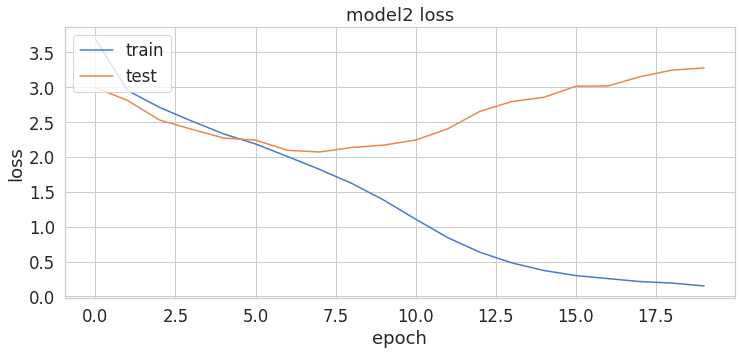

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')